# Introduction to Scikit-learn (sklearn)

## Scikit-learn workflow

In [1]:
#Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create feature matrix
X = heart_disease.drop('target', axis=1)

# Create label matrix
y = heart_disease['target']

In [4]:
# Choose a model and parameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 94)

# No changes to parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 94,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
# Make a prediction
#y_label = clf.predict(np.array([0,2,3,4]))

In [8]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [9]:
y_test

287    0
85     1
197    0
111    1
65     1
      ..
276    0
226    0
297    0
267    0
100    1
Name: target, Length: 61, dtype: int64

In [10]:
# Evaluate the model
clf.score(X_train,y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.7868852459016393

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.61      0.75        31
           1       0.71      0.97      0.82        30

    accuracy                           0.79        61
   macro avg       0.83      0.79      0.78        61
weighted avg       0.83      0.79      0.78        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[19, 12],
       [ 1, 29]], dtype=int64)

In [14]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [15]:
# Imporove a model
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%')

Trying model with 10 estimators...
Model accuracy on test set: 77.05%
Trying model with 20 estimators...
Model accuracy on test set: 78.69%
Trying model with 30 estimators...
Model accuracy on test set: 75.41%
Trying model with 40 estimators...
Model accuracy on test set: 77.05%
Trying model with 50 estimators...
Model accuracy on test set: 80.33%
Trying model with 60 estimators...
Model accuracy on test set: 81.97%
Trying model with 70 estimators...
Model accuracy on test set: 80.33%
Trying model with 80 estimators...
Model accuracy on test set: 80.33%
Trying model with 90 estimators...
Model accuracy on test set: 80.33%


In [16]:
# Save a model and load it
import pickle
pickle.dump(clf, open('model1.pkl','wb'))

In [17]:
loaded_model = pickle.load(open('model1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.8032786885245902

# Preparing data

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Converting data to numerical

In [23]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split into X Y
X = car_sales.drop('Price', axis=1)
Y = car_sales['Price']

# Split into training/test set
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size=0.2)

In [27]:
# Convert strings to floats 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                                 remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [28]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [29]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [30]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies


,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [31]:
np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,
                                                 Y,
                                                test_size=0.2)
# Build a model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.3235867221569877

# Missing values case

1. Filling (imputation)
2. Removing

In [32]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [33]:
# Missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# Fill missing data
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean,
                                          inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)

In [35]:
# Remove rows with missing price
car_sales_missing.dropna(inplace=True)

In [36]:
X = car_sales_missing.drop('Price', axis=1)
Y = car_sales_missing['Price']

In [37]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [38]:
# Convert to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                                 remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

# Fill missing values with sklearn

In [39]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# Drop rows with no label
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [42]:
# Split into X & Y
X = car_sales_missing.drop('Price', axis=1)
Y = car_sales_missing['Price']

In [43]:
# Fill missing values 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

# Transform data
filled_X =  imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [44]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns = ['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [45]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [46]:
# Convert to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                                 remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [47]:
# Fitting model
np.random.seed(123456)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                   Y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.2989686856679161

In [48]:
len(car_sales_filled), len(car_sales)

(950, 1000)

# Choosing right algorithm/estimator

In [49]:
# Import housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [50]:
boston_df = pd.DataFrame(boston['data'],
                         columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
len(boston_df)

506

In [52]:
# Ridge Regression model
from sklearn.linear_model import Ridge

# Set up seed
np.random.seed(123456)

# Create data
X = boston_df.drop('target', axis=1)
Y = boston_df['target']

# Split sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instatiate ridge model
model = Ridge()
model.fit(X_train, Y_train)

# Check score on test data
model.score(X_test, Y_test)

0.7231787877587292

In [53]:
# Improve score wtih RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(123)

# Create data
X = boston_df.drop('target', axis=1)
Y = boston_df['target']

# Split sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instatiate ridge model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)

# Check score on test data
model_rf.score(X_test, Y_test)

0.7710822655053051

In [54]:
model.score(X_test, Y_test)

0.6790962912365031

# Classification model

In [55]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
# Linear SVC
from sklearn.svm import LinearSVC

# Random seed
np.random.seed(123)

# Make data
X = heart_disease.drop(['target'], axis=1)
Y = heart_disease['target']

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Linear SVC
clf = LinearSVC(max_iter=9999)
clf.fit(X_train, Y_train)

# Evaluate Linear SVC
clf.score(X_test, Y_test)

C:\Users\Adam\Documents\GitHub\udemy_complete-machine-learning-and-data-science\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7049180327868853

In [57]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [58]:
# Linear SVC
from sklearn.ensemble import RandomForestClassifier

# Random seed
np.random.seed(123)

# Make data
X = heart_disease.drop(['target'], axis=1)
Y = heart_disease['target']

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Linear SVC
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Evaluate Linear SVC
clf.score(X_test, Y_test)

0.7704918032786885

# Fitting model

In [59]:
# Linear SVC
from sklearn.ensemble import RandomForestClassifier

# Random seed
np.random.seed(123)

# Make data
X = heart_disease.drop(['target'], axis=1)
Y = heart_disease['target']

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Linear SVC
clf = RandomForestClassifier()

# Fir the model to the data
clf.fit(X_train, Y_train)

# Evaluate Linear SVC
clf.score(X_test, Y_test)

0.7704918032786885

In [60]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


# Making predictions

1. predict()
2. predict_proba()

In [61]:
clf.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [62]:
np.array([Y_test])

array([[1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]], dtype=int64)

In [63]:
# Compare prediction to thuyth labels
Y_preds = clf.predict(X_test)
np.mean(Y_preds == Y_test)

0.7704918032786885

In [64]:
clf.score(X_test, Y_test)

0.7704918032786885

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_preds)

0.7704918032786885

In [66]:
clf.predict_proba(X_test[:5])

array([[0.02, 0.98],
       [0.9 , 0.1 ],
       [0.94, 0.06],
       [0.95, 0.05],
       [0.1 , 0.9 ]])

In [67]:
clf.predict(X_test[:5])

array([1, 0, 0, 0, 1], dtype=int64)

In [68]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [69]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2


In [70]:
# Import & seed
from sklearn.ensemble import RandomForestRegressor
np.random.seed(123)

# Create
X = boston_df.drop('target', axis=1)
Y = boston_df['target']

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instatiate and fit
model = RandomForestRegressor().fit(X_train, Y_train)

# Predict
Y_preds = model.predict(X_test)
Y_preds[:10]

array([32.887, 27.844, 48.383, 20.895, 31.244, 42.73 , 23.476,  8.58 ,
       18.299, 30.774])

In [71]:
np.array(Y_test[:10])

array([15. , 26.6, 45.4, 20.8, 34.9, 21.9, 28.7,  7.2, 20. , 32.2])

In [72]:
# Compare predictions to labes
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)

2.4637058823529423

# Evaluating model

* estimator score method
* scoring parameter
* problem-specific metric functions

## Score method

In [73]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed()

X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
clf.score(X_test, Y_test)

0.8032786885245902

### Same for regression

In [75]:
# Import & seed
from sklearn.ensemble import RandomForestRegressor
np.random.seed(123)

# Create
X = boston_df.drop('target', axis=1)
Y = boston_df['target']

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instatiate and fit
model = RandomForestRegressor().fit(X_train, Y_train)

# Predict
Y_preds = model.predict(X_test)
Y_preds[:10]

array([32.887, 27.844, 48.383, 20.895, 31.244, 42.73 , 23.476,  8.58 ,
       18.299, 30.774])

In [76]:
model.score(X_test, Y_test)

0.7710822655053051

## Scoring parameters

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1234)

X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
clf.score(X_test, Y_test)

0.7704918032786885

In [79]:
cross_val_score(clf, X, Y, cv=10).mean()

0.8217204301075268

In [80]:
np.random.seed(1234)

# single training and test split score
clf_single_score = clf.score(X_test, Y_test)

# take the mean of cv score
clf_cross_val_score = np.mean(cross_val_score(clf, X, Y, cv=5))

# compare
clf_single_score, clf_cross_val_score

(0.7704918032786885, 0.821639344262295)

In [81]:
# Scoring parameter set to None by default, then uses mean acucracy
cross_val_score(clf, X, Y, cv=5, scoring=None)

array([0.81967213, 0.86885246, 0.80327869, 0.81666667, 0.78333333])

## Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

## Accuracy

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(123)

X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, Y, cv=10)


In [83]:
np.mean(cross_val_score)

0.8147311827956989

In [84]:
print(f'Heart disease classifier cross-validated accuracy: {np.mean(cross_val_score)*100:.2f}%')

Heart disease classifier cross-validated accuracy: 81.47%


## Area under ROC (receiver operating characteristic) curve

ROC curve - comparison between true positive rate and false positive rate

In [85]:
from sklearn.metrics import roc_curve

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Fit classifier
clf.fit(X_train, Y_train)

# Make prediction with probabilities
Y_probs = clf.predict_proba(X_test)
Y_probs[:10]

array([[0.06, 0.94],
       [0.97, 0.03],
       [0.15, 0.85],
       [1.  , 0.  ],
       [0.34, 0.66],
       [0.07, 0.93],
       [0.68, 0.32],
       [0.  , 1.  ],
       [0.59, 0.41],
       [0.48, 0.52]])

In [86]:
Y_probs_positive = Y_probs[:, 1]
Y_probs_positive

array([0.94, 0.03, 0.85, 0.  , 0.66, 0.93, 0.32, 1.  , 0.41, 0.52, 0.  ,
       0.94, 0.43, 0.55, 0.9 , 0.49, 0.46, 0.49, 0.17, 0.64, 0.95, 0.13,
       0.97, 0.11, 0.16, 0.37, 0.55, 0.21, 0.06, 0.77, 0.94, 0.6 , 0.9 ,
       0.96, 0.22, 0.83, 0.95, 0.98, 0.85, 0.78, 0.68, 0.32, 0.17, 0.73,
       0.34, 0.24, 0.15, 0.7 , 0.3 , 0.4 , 0.58, 0.87, 0.18, 0.98, 0.79,
       0.23, 0.74, 0.11, 0.  , 0.3 , 0.07])

In [87]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs_positive)

# Check fpr
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03703704, 0.03703704, 0.07407407, 0.07407407,
       0.07407407, 0.07407407, 0.14814815, 0.22222222, 0.22222222,
       0.33333333, 0.33333333, 0.37037037, 0.48148148, 0.48148148,
       0.51851852, 0.59259259, 0.7037037 , 0.77777778, 0.88888889,
       1.        ])

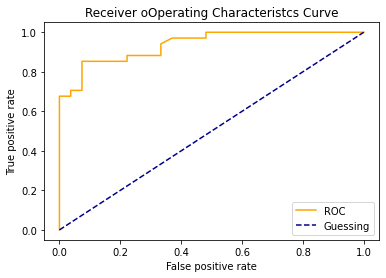

In [88]:
# Create a function for plotting ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    '''
    Plots a ROC curbe given the fpr and tpr of a model.
    '''
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    # Customize plot
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver oOperating Characteristcs Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [89]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, Y_probs_positive)

0.9373638344226579

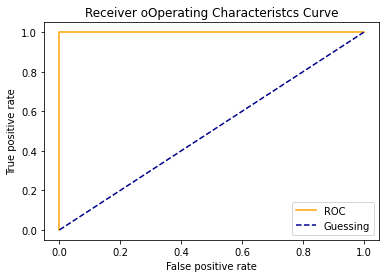

In [90]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(Y_test, Y_test)
plot_roc_curve(fpr, tpr)

In [91]:
# Perfect AUC score
roc_auc_score(Y_test, Y_test)

1.0

## Confusion metric

Way to compare labels and model predicts.

In [92]:
from sklearn.metrics import confusion_matrix

Y_preds = clf.predict(X_test)

confusion_matrix(Y_test, Y_preds)

array([[25,  2],
       [ 5, 29]], dtype=int64)

In [93]:
# Visualize confusion matrix
pd.crosstab(Y_test,
           Y_preds,
           rownames=['Actual labels'],
           colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,25,2
1,5,29


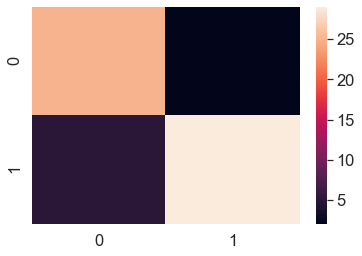

In [94]:
import seaborn as sns

# Set font size
sns.set(font_scale=1.5)

# Create confusion matrix
conf_mat = confusion_matrix(Y_test, Y_preds)

# Plot
sns.heatmap(conf_mat);

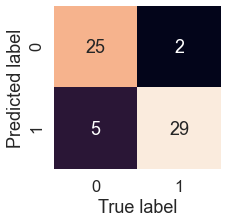

In [95]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(conf_mat)

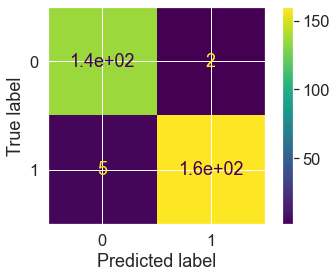

In [96]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, Y)

## Classification report

In [97]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.94      0.85      0.89        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [98]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\Adam\Documents\GitHub\udemy_complete-machine-learning-and-data-science\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## Regression model evaluation metrics
1. r-squared or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

# R-squared

In [99]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(123)

X = boston_df.drop('target', axis=1)
Y = boston_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


model = RandomForestRegressor()
model.fit(X_train, Y_train);
model.score(X_test, Y_test)

0.7710822655053051

In [100]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
Y_test_mean = np.full(len(Y_test), Y_test.mean())
Y_test_mean

array([23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15882353,
       23.15882353, 23.15882353, 23.15882353, 23.15882353, 23.15

In [101]:
r2_score(Y_test, Y_test_mean)

0.0

In [102]:
r2_score(Y_test, Y_test)

1.0

# Mean absolute error (MAE)

In [103]:
from sklearn.metrics import mean_absolute_error

Y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_preds)
mae

2.4637058823529423

In [104]:
df = pd.DataFrame(data={'actual values': Y_test,
                 'predicted values': Y_preds})
df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
410,15.0,32.887,17.887
85,26.6,27.844,1.244
280,45.4,48.383,2.983
422,20.8,20.895,0.095
199,34.9,31.244,-3.656
...,...,...,...
229,31.5,29.321,-2.179
159,23.3,25.388,2.088
196,33.3,34.049,0.749
345,17.5,20.211,2.711


## Mean squared error (MSE)

In [105]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_preds)
mse

18.93968170588236

In [106]:
# Calculate by hand
squared = np.square(df['differences'])
squared.mean()

18.93968170588236

## Scoring parameter

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(123)

X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

clf = RandomForestClassifier()

In [108]:
np.random.seed(123)
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring=None)
cv_acc

array([0.83606557, 0.8852459 , 0.7704918 , 0.78333333, 0.78333333])

In [109]:
# Cross validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:2f}%')

The cross-validated accuracy is: 81.169399%


In [110]:
np.random.seed(123)
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
cv_acc

array([0.83606557, 0.8852459 , 0.7704918 , 0.78333333, 0.78333333])

In [111]:
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:2f}%')

The cross-validated accuracy is: 81.169399%


In [112]:
cv_precision = cross_val_score(clf, X, Y, cv=5, scoring='precision')
np.mean(cv_precision)

0.8284149184149184

In [113]:
cv_recall = cross_val_score(clf, X, Y, cv=5, scoring='recall')
np.mean(cv_recall)

0.8666666666666666

In [114]:
cv_f1 = cross_val_score(clf, X, Y, cv=5, scoring='f1')
np.mean(cv_f1)

0.8427988942119378

### Regression model

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(123)

X = boston_df.drop('target', axis=1)
Y = boston_df['target']

model = RandomForestRegressor()

In [116]:
np.random.seed(123)
cv_r2 = cross_val_score(model, X, Y, cv=5, scoring=None)
np.mean(cv_r2)

0.6284170709042096

In [117]:
np.random.seed(123)
cv_r2 = cross_val_score(model, X, Y, cv=5, scoring='r2')
np.mean(cv_r2)

0.6284170709042096

In [118]:
# Mean absolute error
cv_mae = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-2.945494272956707

In [119]:
# Mean squared error
cv_mse = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-21.598967655464946

### Evaluation metric functions

1. Classification

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(123)

X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

Y_preds = clf.predict(X_test)

print('Classifier metrics on the test set:')
print(f'Accuracy: {accuracy_score(Y_test, Y_preds)*100:.2f}%')
print(f'Precision: {precision_score(Y_test, Y_preds)}')
print(f'Recall: {recall_score(Y_test, Y_preds)}')
print(f'F1: {f1_score(Y_test, Y_preds)}')

Classifier metrics on the test set:
Accuracy: 77.05%
Precision: 0.7741935483870968
Recall: 0.7741935483870968
F1: 0.7741935483870968


2. Regression

In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(123)

X = boston_df.drop('target', axis=1)
Y = boston_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestRegressor()
clf.fit(X_train, Y_train)

Y_preds = clf.predict(X_test)

print('Classifier metrics on the test set:')
print(f'R2: {r2_score(Y_test, Y_preds)*100:.2f}%')
print(f'Mean absolute error: {mean_absolute_error(Y_test, Y_preds)}')
print(f'Mean squared error: {mean_squared_error(Y_test, Y_preds)}')

Classifier metrics on the test set:
R2: 77.11%
Mean absolute error: 2.4637058823529423
Mean squared error: 18.93968170588236


## Improving a model

First model/predictions = baseline mode/predictions

* more data
* improving data

* model selection
* improve model (parameters & hyperparameters)

In [122]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params() # Get list of hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning parameters by hand



In [123]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Parameters to adjust

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [124]:
def evaluate_preds(Y_true, Y_preds):
    '''
    Performs evaluation comparison on Y_true vs Y_preds on classification model
    '''
    accuracy = accuracy_score(Y_true, Y_preds)
    precision = precision_score(Y_true, Y_preds)
    recall = recall_score(Y_true, Y_preds)
    f1 = f1_score(Y_true, Y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                  'precision': round(precision,2),
                  'recall': round(recall,2),
                  'f1': round(f1,2)}
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}')
    print(f'Recall: {recall * 100:.2f}')
    print(f'F1 score: {f1 * 100:.2f}')
    
    return metric_dict

In [125]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### By hand

In [126]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(123)

# Shuffle data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
Y = heart_disease_shuffled['target']

# Split into train, cv & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
val_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, Y_train = X[:train_split], Y[:train_split]
X_val, Y_val = X[train_split:val_split], Y[train_split:val_split]
X_test, Y_test = X[val_split:], Y[val_split:]

len(X_train), len(X_val), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Baseline prediction
Y_preds = clf.predict(X_val)

# Evaluate on val set
baseline_metrics = evaluate_preds(Y_val, Y_preds)
baseline_metrics

Accuracy: 80.00%
Precision: 81.48
Recall: 84.62
F1 score: 83.02


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.85, 'f1': 0.83}

In [127]:
# Changing max_depth

np.random.seed(123)
clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(X_train, Y_train)

# Baseline prediction
Y_preds_2 = clf_2.predict(X_val)

# Evaluate on val set
baseline_metrics = evaluate_preds(Y_val, Y_preds_2)
baseline_metrics

Accuracy: 80.00%
Precision: 81.48
Recall: 84.62
F1 score: 83.02


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.85, 'f1': 0.83}

### RandomizeSearchCV

In [128]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
       'max_depth': [None, 5, 10, 20, 30],
       'max_features': ['auto', 'sqrt'],
       'min_samples_split': [2, 4, 6],
       'min_samples_leaf': [1, 2, 4]}

np.random.seed(123)

# Split X & Y
X = heart_disease_shuffled.drop('target', axis=1)
Y = heart_disease_shuffled['target']

# Split train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instatiate model
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV 
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=50,
                           cv=5,
                           verbose=2)
# Fit RandomizedSearchCV version of clf
rs_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_sam

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=10, min_samples_split=6, 

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=6, min_sam

[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=100, min_samples_split=2,

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [129]:
# Find best combination

rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [130]:
# Make prediction with best parameters
rs_Y_preds = rs_clf.predict(X_test)

# Evaluate RS predictions
rs_metrics = evaluate_preds(Y_test, rs_Y_preds)

Accuracy: 88.52%
Precision: 85.71
Recall: 93.75
F1 score: 89.55


In [131]:
# Baseline metrics
baseline_metrics = evaluate_preds(Y_val, Y_preds_2)
baseline_metrics

Accuracy: 80.00%
Precision: 81.48
Recall: 84.62
F1 score: 83.02


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.85, 'f1': 0.83}

In [132]:
### Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV, train_test_split

grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

np.random.seed(123)

# Split X & Y
X = heart_disease_shuffled.drop('target', axis=1)
Y = heart_disease_shuffled['target']

# Split train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instatiate model
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV 
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit GridSearchCV version of clf
gs_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   20.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [133]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [134]:
# Make prediction with best parameters
gs_Y_preds = gs_clf.predict(X_test)

# Evaluate GS predictions
gs_metrics = evaluate_preds(Y_test, gs_Y_preds)

Accuracy: 90.16%
Precision: 88.24
Recall: 93.75
F1 score: 90.91


In [135]:
# Baseline metrics
baseline_metrics = evaluate_preds(Y_val, Y_preds_2)

Accuracy: 80.00%
Precision: 81.48
Recall: 84.62
F1 score: 83.02


#### Comparing models metrics

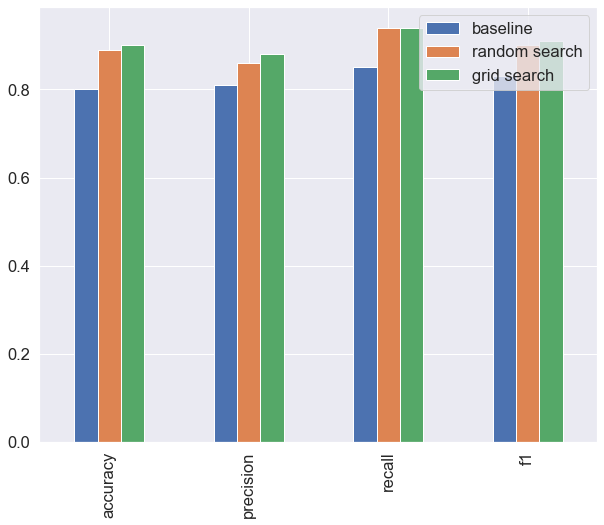

In [136]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

# Saving and loading trained model

## Pickle module

In [137]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))

In [138]:
# Load a pickle file
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [139]:
# Make predictions

pickle_Y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(Y_test, pickle_Y_preds)

Accuracy: 90.16%
Precision: 88.24
Recall: 93.75
F1 score: 90.91


{'accuracy': 0.9, 'precision': 0.88, 'recall': 0.94, 'f1': 0.91}

## Joblib module

In [140]:
from joblib import dump, load

# Save model to file

dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [141]:
# Import saved joblib model
loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')

In [142]:
# Make predictions

joblib_Y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(Y_test, joblib_Y_preds);

Accuracy: 90.16%
Precision: 88.24
Recall: 93.75
F1 score: 90.91


# Putting all together

**Read data file**

In [144]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


**Check data types**

In [145]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

**Check empty cells**

In [146]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

**Steps**
1. Filling missing data
2. Converting data to numerical
3. Building a model on the data

In [178]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

**GridSearchCV/RandomizeSearchCV with Pipeline**

In [181]:
# Use GridSearchCV with the Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_featur

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, mod

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [182]:
gs_model.score(X_test, y_test)

0.3339554263158365